<img src="../../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# _*Qiskit Finance: Loading and Processing Stock-Market Time-Series Data*_

The latest version of this notebook is available on https://github.com/qiskit/qiskit-tutorial.

***
### Contributors
Jakub Marecek<sup>[1]</sup>

### Affiliation
- <sup>[1]</sup>IBMQ

### Introduction
Across many problems in finance, one starts with time series. Here, we showcase how to download the time series from a number of common providers.

In [17]:
%matplotlib inline
from qiskit.aqua.translators.data_providers import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [18]:
stocks = ["GOOG", "AAPL"]
from qiskit.aqua.translators.data_providers.wikipediadataprovider import StockMarket
wiki = WikipediaDataProvider(token = "",
                 tickers = stocks,
                 stockmarket = StockMarket.NASDAQ.value,
                 start = datetime.datetime(2016,1,1),
                 end = datetime.datetime(2016,1,30))
wiki.run()

Once the data are loaded, you can run a variety of algorithms on those to aggregate the data. Notably, you can compute the covariance matrix or a variant, which would consider alternative time-series similarity measures based on <a target="_blank" href="https://en.wikipedia.org/wiki/Dynamic_time_warping">dynamic time warping</a> (DTW). In DTW, changes that vary in speed, e.g., one stock's price following another stock's price with a small delay, can be accommodated.

A time-series similarity measure:
[[1.00000000e+00 8.44268222e-05]
 [8.44268222e-05 1.00000000e+00]]


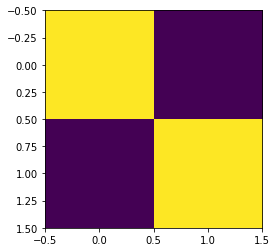

A covariance matrix:
[[269.60118129  25.42252332]
 [ 25.42252332   7.86304499]]


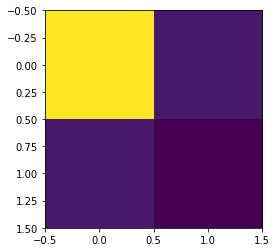

In [19]:
if wiki._n <= 1: 
    raise Exception("Not enough data to plot covariance or time-series similarity. Please use at least two tickers.")

rho = wiki.get_similarity_matrix()
print("A time-series similarity measure:")
print(rho)
#plt.subplot(211)
plt.imshow(rho)
plt.show()

cov = wiki.get_covariance()
print("A covariance matrix:")
print(cov)
#plt.subplot(212)
plt.imshow(cov)
plt.show()

If you wish, you can look into the internals using:

The underlying evolution of stock prices:


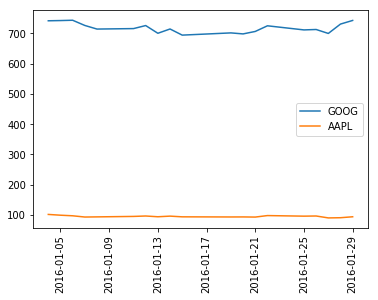

GOOG
Date
2016-01-04    741.84
2016-01-05    742.58
2016-01-06    743.62
2016-01-07    726.39
2016-01-08    714.47
2016-01-11    716.03
2016-01-12    726.07
2016-01-13    700.56
2016-01-14    714.72
2016-01-15    694.45
2016-01-19    701.79
2016-01-20    698.45
2016-01-21    706.59
2016-01-22    725.25
2016-01-25    711.67
2016-01-26    713.04
2016-01-27    699.99
2016-01-28    730.96
2016-01-29    742.95
Name: Adj. Close, dtype: float64
AAPL
Date
2016-01-04    101.783763
2016-01-05     99.233131
2016-01-06     97.291172
2016-01-07     93.185040
2016-01-08     93.677776
2016-01-11     95.194629
2016-01-12     96.576222
2016-01-13     94.093220
2016-01-14     96.151117
2016-01-15     93.842021
2016-01-19     93.387931
2016-01-20     93.513531
2016-01-21     93.040118
2016-01-22     97.986799
2016-01-25     96.073825
2016-01-26     96.605206
2016-01-27     90.257610
2016-01-28     90.904929
2016-01-29     94.044912
Name: Adj. Close, dtype: float64


In [9]:
print("The underlying evolution of stock prices:")
for (cnt, s) in enumerate(stocks):
    plt.plot(wiki._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.show()

for (cnt, s) in enumerate(stocks):
    print(s)
    print(wiki._data[cnt])

### [Optional] Setup token to access recent, fine-grained time-series

If you would like to download professional data, you will have to set-up a token with one of the major providers. Let us now illustrate the data with NASDAQ Data on Demand, which can supply bid and ask prices in arbitrary resolution, as well as aggregates such as daily adjusted closing prices, for NASDAQ and NYSE issues.


If you have access to NASDAQ Data on Demand you should have your own token, which you should use instead of REPLACE-ME below. 
Also you should have your own means of validating NASDAQ's certificates.
If you don't you may want to run the cell below to disable the associated warnings. 

In [12]:
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [13]:
from qiskit.aqua.translators.data_providers.dataondemandprovider import StockMarket
try:
  nasdaq = DataOnDemandProvider(token = "REPLACE-ME",
                 tickers = ["GOOG", "AAPL"],
                 stockmarket = StockMarket.NASDAQ.value,
                 start = datetime.datetime(2016,1,1),
                 end = datetime.datetime(2016,1,2))
  nasdaq.run()
  nasdaq.plot()
except QiskitFinanceError as e:
    print(e)
    print("You need to replace REPLACE-ME with a valid token.")

'Accessing NASDAQ Data on Demand failed.'
You need to replace REPLACE-ME with a valid token.


Another major vendor of stock market data is Exchange Data International (EDI), whose feeds can be used to query emerging and frontier markets that are Africa, Asia, Far East, Latin America and Middle East, as well as the more established ones. The access again requires a valid access token to replace REPLACE-ME below.

In the following example, we look at the prices at London Stock Exchange. 

In [15]:
from qiskit.aqua.translators.data_providers.exchangedataprovider import StockMarket
try:
  lse = ExchangeDataProvider(token = "REPLACE-ME",
                 tickers = ["AIBGl", "AVSTl"],
                 stockmarket = StockMarket.LONDON.value,
                 start = datetime.datetime(2019,1,1),
                 end = datetime.datetime(2019,1,30))
  lse.run()
  lse.plot()
except QiskitFinanceError as e: 
    print(e)
    print("You need to replace REPLACE-ME with a valid token.")

'Cannot retrieve Exchange Data data.'
You need to replace REPLACE-ME with a valid token.


For the actual use of the data, please see the portfolio_optimization or portfolio_diversification notebooks. 